#Trabalho prático # 2

##Introdução à Computação Numérica

###Tópico: Interpolação polinomial e Integração numérica

---

Nome: *(juan pedro perri barreto)*

DRE: *()*


---

**Instruções:**

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 13/outubro/2024*

---


## Tarefa #1: Avaliando o polinômio interpolador

Implemente funções em Python para avaliar o polinômio interpolador $p_n(x)$, considerando como dados de entrada o valor de $x$ e duas listas contendo os valores dos $x_i$ e dos $y_i$ ($i=0,\dots,n$), respectivamente.

a) Use o polinômio interpolador na forma de Newton:
$$
p_n(x) = c_0 + c_1(x-x_0)+\cdots+c_n(x-x_0)\cdots(x-x_{n-1}),
$$
em que $$c_i = f[x_0,\dots,x_i], \quad i=0,\dots,n.$$
Observe que o processo de avaliação pode ser simplificado re-escrevendo o polinômio como
$$
  p_n(x) = c_0 + (x-x_0)(c_1+(x-x_1)(\cdots c_{n-1}+c_n(x-x_{n-1})\cdots)).
$$

b) Escolha um conjunto de datos e faça vários testes da sua função.


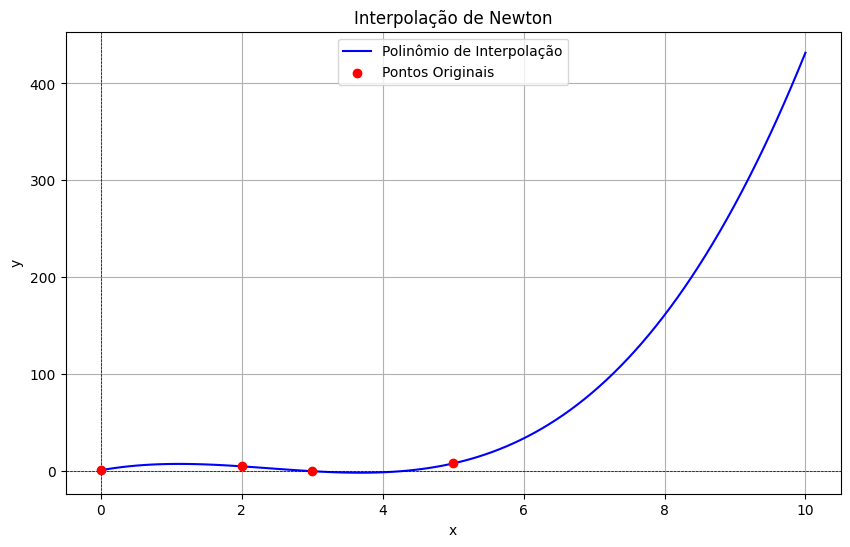

In [12]:
# letra a

import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Função de Divisão das Diferenças
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0]

# Passo 2: Função de Interpolação de Newton
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]

    for k in range(n-1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p

# Passo 3: Dados de entrada
x = np.array([0, 2, 3, 5])
y = np.array([1, 5, 0, 8])

# Coeficientes do polinômio
coeficientes = divide_diferenca(x, y)

# Intervalo para a interpolação
x_interpolacao = np.linspace(0, 10, 100)
y_interpolacao = poli_newton_simplificado(coeficientes, x, x_interpolacao)

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(x_interpolacao, y_interpolacao, label='Polinômio de Interpolação', color='blue')
plt.scatter(x, y, color='red', label='Pontos Originais', zorder=5)
plt.title('Interpolação de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


letra b

Caso 1:
o valor da interpolacao em x = 5 foi 21.555556


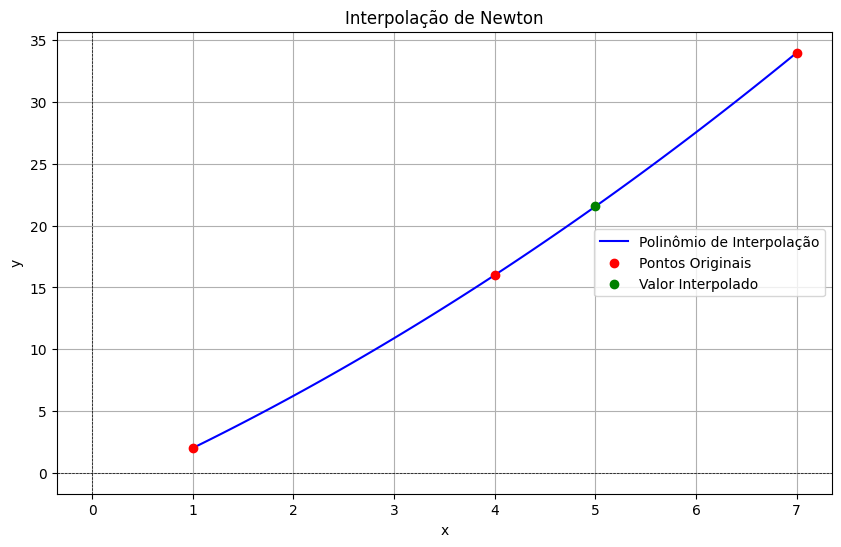


Caso 2:
o valor da interpolacao em x = 2.5 foi 42.875000


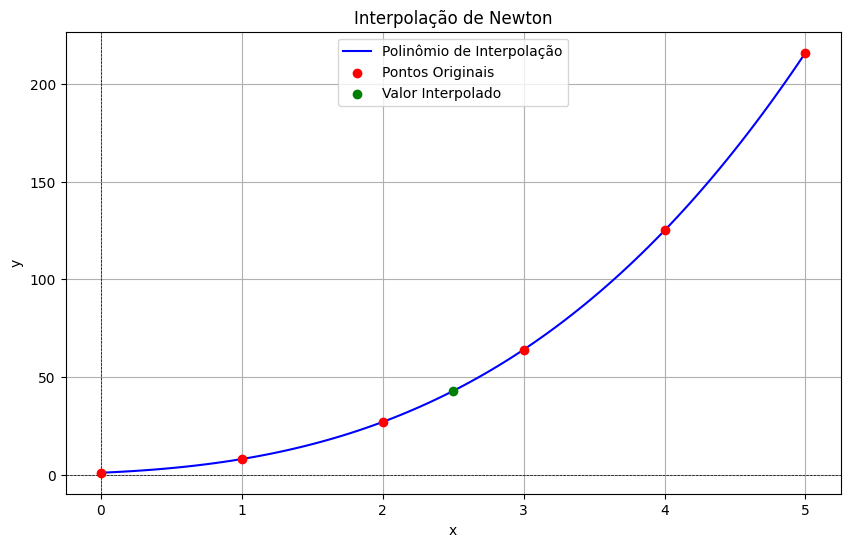


Caso 3:
o valor da interpolacao em x = 4.5 foi 108.613983


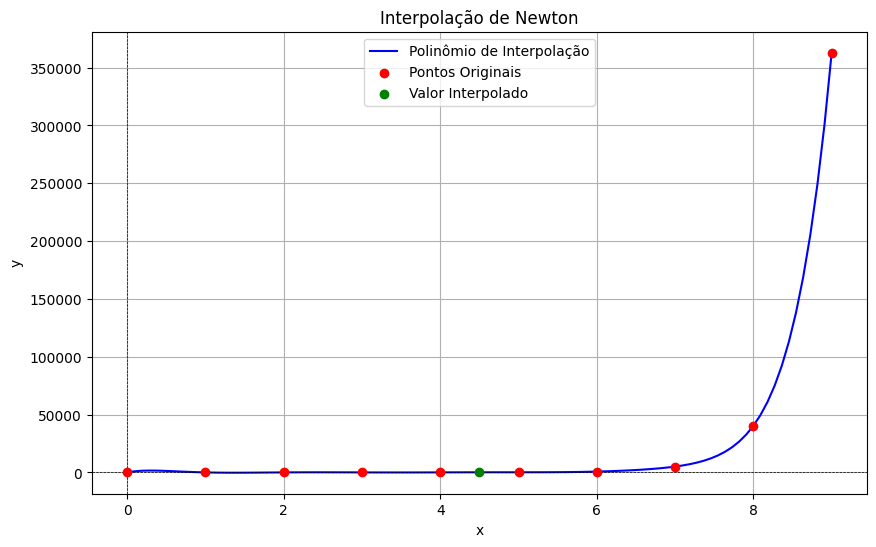

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular as diferenças divididas (sem mudanças)
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]  # Retorna os coeficientes

# Função para calcular o valor do polinômio utilizando a forma aninhada
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]  # Começa com o último coeficiente

    # Constrói o polinômio usando a equação aninhada
    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p
# Função para testar a interpolação e plotar os resultados
def testar_interpolacao(x, y, x_valor):
    coeficientes = divide_diferenca(x, y)
    interpolacao_valor = poli_newton_simplificado(coeficientes, x, x_valor)

    # Exibir o valor da interpolação
    print(f"o valor da interpolacao em x = {x_valor} foi {interpolacao_valor:.6f}")

    # Plotando os resultados
    x_interpolacao = np.linspace(min(x), max(x), 100)  # Intervalo para a interpolação
    y_interpolacao = poli_newton_simplificado(coeficientes, x, x_interpolacao)

    plt.figure(figsize=(10, 6))
    plt.plot(x_interpolacao, y_interpolacao, label='Polinômio de Interpolação', color='blue')
    plt.scatter(x, y, color='red', label='Pontos Originais', zorder=5)
    plt.scatter(x_valor, interpolacao_valor, color='green', label='Valor Interpolado', zorder=5)
    plt.title('Interpolação de Newton')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black', linewidth=0.5, ls='--')
    plt.axvline(0, color='black', linewidth=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()

# Caso 1: Pequeno conjunto de dados
x1 = np.array([1, 4, 7])
y1 = np.array([2, 16, 34])
print("Caso 1:")
testar_interpolacao(x1, y1, 5)

# Caso 2: Conjunto de dados médio
x2 = np.array([0, 1, 2, 3, 4, 5])
y2 = np.array([1, 8, 27, 64, 125, 216])
print("\nCaso 2:")
testar_interpolacao(x2, y2, 2.5)

# Caso 3: Grande conjunto de dados
x3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y3 = np.array([1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880])
print("\nCaso 3:")
testar_interpolacao(x3, y3, 4.5)

##Tarefa #2

a) Fenômeno de Runge.

Dada a função de Runge $$f(x) = \frac{1}{1+25 x^2},$$ considere o polinômio interpolador $p_n(x)$ sobre os pontos $(x_i, f(x_i))$ com $$x_i = -1+ \frac{2 i}{n},\quad i=0,\dots,n.$$ Para $n=5, 10, 15$ e $20$, obtenha o valor máximo do erro de interpolação nos pontos de controle correspondentes à $$\tilde{x}_j = -1+ \frac{2 j+1}{100}, \quad j=0,\dots,99,$$ ou seja, há que obter
$$E_n = \max_{j=0,\dots,99} |f(\tilde{x}_j) - p_n(\tilde{x}_j)|.$$

b) Re-faça o item a), mas usando os **nós de Chebyshev**: $$x_i = \cos({i\pi}/{n}),\quad i=0,\dots,n.$$

c) Discuta e explique os resultados obtidos em a) e b) no seu relatório.


Erro máximo para n = 5: 0.430325
Erro máximo para n = 10: 1.915434
Erro máximo para n = 15: 2.096723
Erro máximo para n = 20: 58.406690


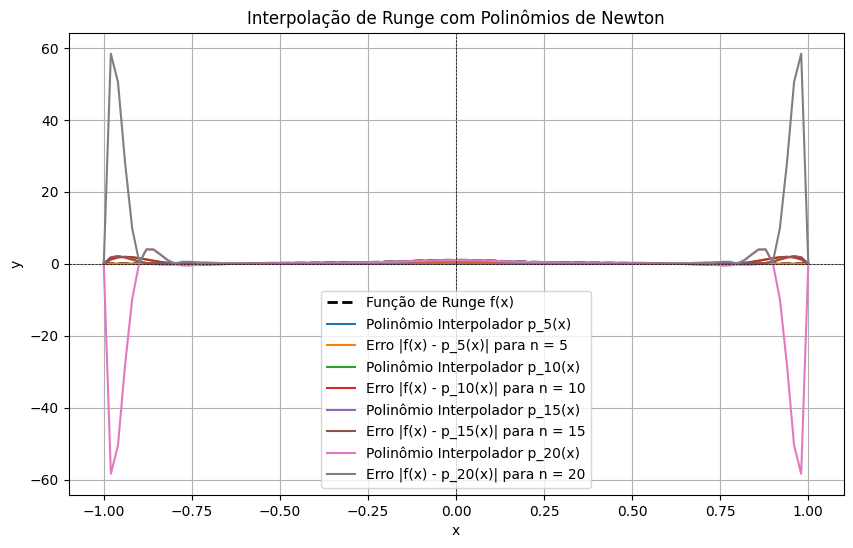

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Runge
def runge(x):
    return 1 / (1 + 25 * x**2)

# Função para calcular as diferenças divididas (para interpolação de Newton)
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]  # Retorna os coeficientes

# Função para calcular o valor do polinômio utilizando a forma aninhada
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]  # Começa com o último coeficiente

    # Constrói o polinômio usando a equação aninhada
    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p

# Número de pontos de interpolação
n_valores = [5, 10, 15, 20]

# Pontos de controle x
x_controle = np.linspace(-1, 1, 100)

# Plotando a função de Runge e os polinômios interpoladores
plt.figure(figsize=(10, 6))
plt.plot(x_controle, runge(x_controle), 'k--', label='Função de Runge f(x)', linewidth=2)

for n in n_valores:
    x_interp = np.linspace(-1, 1, n + 1)
    y_interpolacao = runge(x_interp)

    # Calcula os coeficientes usando diferenças divididas
    coeficientes = divide_diferenca(x_interp, y_interpolacao)

    # Avalia o polinômio interpolador
    p_n = poli_newton_simplificado(coeficientes, x_interp, x_controle)

    plt.plot(x_controle, p_n, label=f'Polinômio Interpolador p_{n}(x)', linewidth=1.5)

    # Cálculo do erro máximo
    erro = np.abs(runge(x_controle) - p_n)
    e_n = np.max(erro)

    print(f"Erro máximo para n = {n}: {e_n:.6f}")
    plt.plot(x_controle, erro, label=f'Erro |f(x) - p_{n}(x)| para n = {n}', linewidth=1.5)

# Configurações do gráfico
plt.title('Interpolação de Runge com Polinômios de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


Erro máximo para n = 5: 0.553479
Erro máximo para n = 10: 0.109026
Erro máximo para n = 15: 0.081815
Erro máximo para n = 20: 0.015007


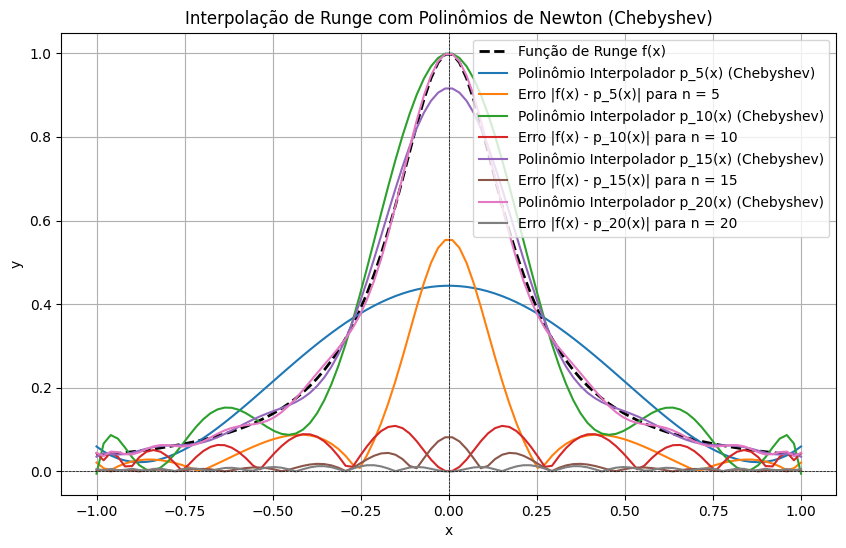

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Runge
def runge(x):
    return 1 / (1 + 25 * x**2)

# Nós de Chebyshev
def chebyshev(n):
    return np.cos((2 * np.arange(n + 1) + 1) / (2 * n + 2) * np.pi)

# Função para calcular as diferenças divididas
def divide_diferenca(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])

    return coef[0]  # Retorna os coeficientes

# Função para calcular o valor do polinômio utilizando a forma aninhada
def poli_newton_simplificado(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]  # Começa com o último coeficiente

    # Constrói o polinômio usando a equação aninhada
    for k in range(n - 1, -1, -1):
        p = coef[k] + (x - x_data[k]) * p

    return p

# Número de pontos de interpolação
n_valores = [5, 10, 15, 20]

# Pontos de controle x
x_controle = np.linspace(-1, 1, 100)

# Plotando a função de Runge e os polinômios interpoladores
plt.figure(figsize=(10, 6))
plt.plot(x_controle, runge(x_controle), 'k--', label='Função de Runge f(x)', linewidth=2)

for n in n_valores:
    x_interp = chebyshev(n)
    y_interpolacao = runge(x_interp)

    # Calcula os coeficientes usando diferenças divididas
    coeficientes = divide_diferenca(x_interp, y_interpolacao)

    # Avalia o polinômio interpolador
    p_n = poli_newton_simplificado(coeficientes, x_interp, x_controle)

    plt.plot(x_controle, p_n, label=f'Polinômio Interpolador p_{n}(x) (Chebyshev)', linewidth=1.5)

    # Cálculo do erro máximo
    erro = np.abs(runge(x_controle) - p_n)
    e_n = np.max(erro)

    print(f"Erro máximo para n = {n}: {e_n:.6f}")
    plt.plot(x_controle, erro, label=f'Erro |f(x) - p_{n}(x)| para n = {n}', linewidth=1.5)

# Configurações do gráfico
plt.title('Interpolação de Runge com Polinômios de Newton (Chebyshev)')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()



relatorio da questão 2

temos por definição um problema quando trabalhamos com interpolação pois a medida que trabalhamos com funções podemos ter um problema de ruido, logo pois em uma abordagem inocente poderíamos achar que quanto mais pontos aplicamos para fazer uma interpolação teríamos uma representação precisa sendo como resolver esse problema de forma numérica a chegar no caso que queremos ter uma precisão que não obtenha ruido, logo o matemático russo chebychev, apresenta uma solução.


equação onde acontece o problema clássico de runge.

$$f(x) = \frac{1}{1+25 x^2},$$
para aplicação a questão nos da uma variedade de pontos de interpolação sendo n = 5,10,15 e 20

foi analisado com dois graficos e dados sendo para para o valor de n de forma respectiva sendo o valor :

erro máximo para n = 5: 0.4303246159624491

erro máximo para n = 10: 1.9154342696799338

erro máximo para n = 15: 2.0967229090176507

erro máximo para n = 20: 58.40669065757495

para valores de n crescente o erro também cresce de forma acentuada, feito isso foi analisado os resultados dos gráficos sendo um gráfico mostrando a interpolação e outro mostrando o erro absoluto que mostra nas extremidades acontece o efeito de runge, e um segundo que mostra como o ruido esta na interpolação sendo que simétricos. foi observado que nas extremidades o erro se propagou de forma exponencial, logo quantos maior os numeros de interpolação maior o nosso erro.

analise da função pois o tratamento de erro de ruido, aplicando nos node of chebshev, sendo representado por:

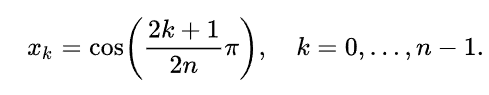


logo a distribuição entre o intervalo [-1,1], para a aplicação.

erro maximo para n = 5: 0.5534788672877784

erro maximo para n = 10: 0.10902564197574771

erro maximo para n = 15: 0.08181531115162599

erro maximo para n = 20: 0.015007174524631961

sendo o inverso da primeira tabela, em que quanto mais pontos para a nossa interpolação melhor ela se torna e com isso temos uma abordagem numérica mais precisa e um erro absoluto menor.


## Tarefa #3

Implemente funções em Python para aproximar a integral definida
$$
I = \int_a^b f(x)\,dx,
$$
usando:

i) a regra dos trapézios repetida/composta;

ii) a regra de Simpson repetida/composta.

a) Considere como parâmetros de entrada o intervalo $[a, b]$, a função $f$ e a quantidade de nós (pontos) que serão usados.

b) Teste sua funções usando um polinômio de quarto grau para $f$. Obtenha aproximações do valor da integral definida dessa função considerando $n=10$, $50$, $100$ e $200$ (note que a quantidade de nós em cada caso será igual a $n+1$). Para cada valor de $n$ obtenha aproximações usando suas implementações das regras dos trapézios e de Simpson.

c) Determine os erros absolutos associados com as aproximações obtidas no item b). Comente e explique, no seu relatório, os resultados obtidos em b) e c).

n	Simpson		Erro(Simpson)	Trapézio	Erro(Trapézio)
5	18.190349	17.857016		22.324519	21.991186
10	20.670851	20.337518		21.084268	20.750935
20	20.670851	20.337518		20.774205	20.440872
50	20.670851	20.337518		20.687388	20.354054
100	20.670851	20.337518		20.674985	20.341652


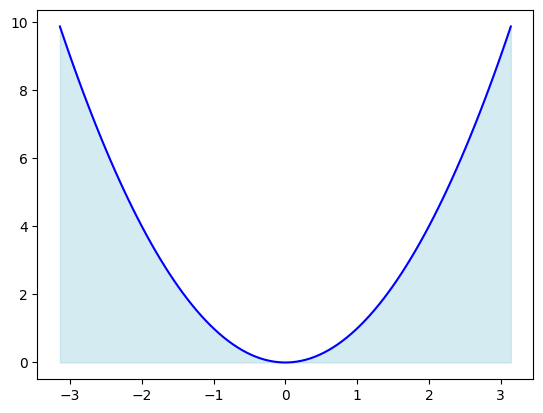

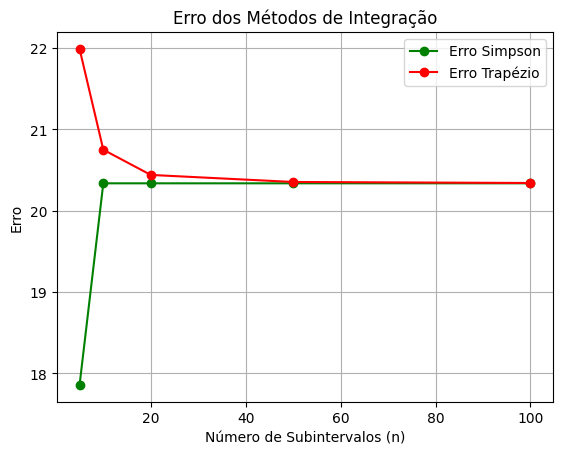

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Função a ser integrada
def f(x):
    return x**2

# Método de Simpson 1/3
def simpson_integrate(a, b, f, n):
    h = (b - a) / n
    integracao = f(a) + f(b)

    for i in range(1, n):
        k = a + i * h
        if i % 2 == 0:
            integracao += 2 * f(k)
        else:
            integracao += 4 * f(k)

    integracao *= h / 3
    return integracao

# Método do Trapézio Composta
def trapezio_composta(a, b, n):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2  # inicializa com a média dos extremos

    for i in range(1, n):
        xi = a + i * h
        integral += f(xi)

    return h * integral

# Definindo os limites da integral
a = -np.pi
b = np.pi
n_list = [5, 10, 20, 50, 100]  # Lista de valores de n

# Listas para armazenar os resultados
resultados_simpsons = []
resultados_trapezio = []
erros_simpsons = []
erros_trapezio = []

# Realizar os cálculos para cada n
for n in n_list:
    integral_simpsons = simpson_integrate(a, b, f, n)
    integral_trapezio = trapezio_composta(a, b, n)

    # Guardando os resultados
    resultados_simpsons.append(integral_simpsons)
    resultados_trapezio.append(integral_trapezio)

    # Calculando os erros relativos (comparando com o valor exato da integral)
    erro_simpson = abs(1/3 - integral_simpsons)
    erro_trapezio = abs(1/3 - integral_trapezio)

    erros_simpsons.append(erro_simpson)
    erros_trapezio.append(erro_trapezio)

# Exibindo os resultados
print("n\tSimpson\t\tErro(Simpson)\tTrapézio\tErro(Trapézio)")
for i in range(len(n_list)):
    print(f"{n_list[i]}\t{resultados_simpsons[i]:.6f}\t{erros_simpsons[i]:.6f}\t\t{resultados_trapezio[i]:.6f}\t{erros_trapezio[i]:.6f}")

# Plotando a função e os pontos
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2', color='blue')
plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)

# Gráfico dos erros
plt.figure()
plt.plot(n_list, erros_simpsons, 'o-', label='Erro Simpson', color='green')
plt.plot(n_list, erros_trapezio, 'o-', label='Erro Trapézio', color='red')
plt.xlabel('Número de Subintervalos (n)')
plt.ylabel('Erro')
plt.title('Erro dos Métodos de Integração')
plt.legend()
plt.grid(True)
plt.show()


relatório da questão 3, os dois métodos para gerar a integração se aplicando da aproximação numérica sendo recomentada para n<2 pois estamos usando seguimentos de retas um comentário que foi abordado durante a sala de aula em que para equações que não sejam maiores que segundo grau, no caso a regra do trapézio e a integração de Simpson para funções de ordem 4 e com isso o erro diminui proporcionalmente como o professor também citou na sala de aula isso pode ser.

ambas são boas para funções suaves logo usei uma função simples que foi usada no colab, para ilustrar o meu ponto visto isso temos como dados.

| n   | Simpson   | Erro(Simpson) | Trapézio  | Erro(Trapézio) |
|-----|-----------|---------------|-----------|----------------|
| 5   | 18.190349 | 17.857016     | 22.324519 | 21.991186      |
| 10  | 20.670851 | 20.337518     | 21.084268 | 20.750935      |
| 20  | 20.670851 | 20.337518     | 20.774205 | 20.440872      |
| 50  | 20.670851 | 20.337518     | 20.687388 | 20.354054      |
| 100 | 20.670851 | 20.337518     | 20.674985 | 20.341652      |

isso da nos mostra que numa função suave a integral de simpson gera valores de erros menores a do trapézio mas ainda sim estamos pegando um caso base em que ambos os algoritmos de integração se beneficiam logo, vamos para uma função de grau 4 sendo os dados obtidos :

|  n   | Simpson   | Erro (Simpson) | Trapézio  | Erro (Trapézio) |
|:----:|:---------:|:--------------:|:---------:|:---------------:|
|  5   | 113.725075 | 113.391742    | 154.527700 | 154.194367      |
| 10   | 122.538442 | 122.205109    | 130.535757 | 130.202423      |
| 20   | 122.416034 | 122.082701    | 124.445965 | 124.112632      |
| 50   | 122.408083 | 122.074749    | 122.734243 | 122.400909      |
| 100  | 122.407887 | 122.074554    | 122.489476 | 122.156143      |

o que confirma a superioridade para grau maiores que 2 no caso da integração de Simpson mas um caso interessante foi quando acidentalmente escolhi um polinômio de grau 5 em que os dados foram contra sendo a integral de Simpson que deu um valor de erro inesperado.

|  n   |    Simpson   |  Erro (Simpson) | Trapézio | Erro (Trapézio) |
|:----:|:------------:|:---------------:|:--------:|:----------------:|
|  5   |  -19.853328  |    20.186661    |  0.000000 |     0.333333     |
| 10   |   0.000000   |    0.333333     |  0.000000 |     0.333333     |
| 20   |  -0.000000   |    0.333333     | -0.000000 |     0.333333     |
| 50   |   0.000000   |    0.333333     |  0.000000 |     0.333333     |
| 100  |   0.000000   |    0.333333     |  0.000000 |     0.333333     |

isso sendo resultado pelo intervalo simétrico que escolho como $[−π,π]$, sendo visto depois uma busca melhor, achei isso um caso atípico e resolvi relatar.



n	Simpson		Erro(Simpson)	Trapézio	Erro(Trapézio)
5	113.725075	113.391742		154.527700	154.194367
10	122.538442	122.205109		130.535757	130.202423
20	122.416034	122.082701		124.445965	124.112632
50	122.408083	122.074749		122.734243	122.400909
100	122.407887	122.074554		122.489476	122.156143


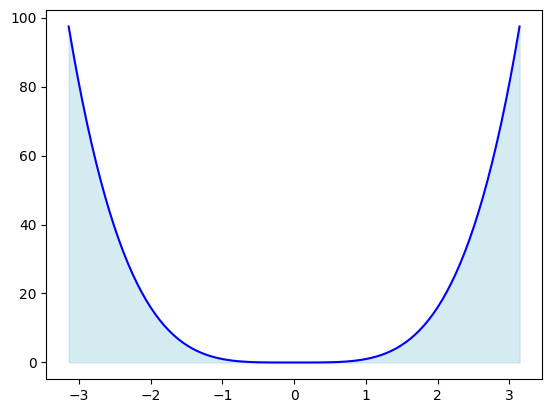

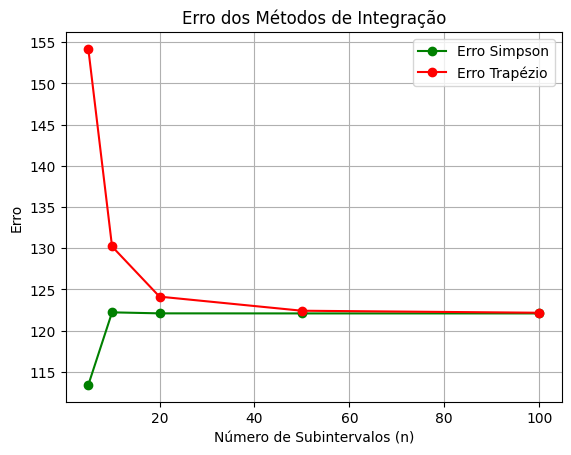

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Função a ser integrada
def f(x):
    return x**4

# Método de Simpson 1/3
def simpson_integrate(a, b, f, n):
    h = (b - a) / n
    integral = f(a) + f(b)

    for i in range(1, n):
        k = a + i * h
        if i % 2 == 0:
            integral += 2 * f(k)
        else:
            integral += 4 * f(k)

    integral *= h / 3
    return integral

# Método do Trapézio
def trapezio_composta(a, b, n):
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2.0

    for i in range(1, n):
        xi = a + i * h
        integral += f(xi)

    return h * integral

# Definir limites e lista de n's
a = -np.pi
b = np.pi
n_list = [5, 10, 20, 50, 100]

# Inicializar listas para guardar os resultados e os erros
resultados_simpsons = []
resultados_trapezio = []
erros_simpsons = []
erros_trapezio = []

# Realizar os cálculos para cada n
for n in n_list:
    integral_simpsons = simpson_integrate(a, b, f, n)
    integral_trapezio = trapezio_composta(a, b, n)

    # Guardando os resultados
    resultados_simpsons.append(integral_simpsons)
    resultados_trapezio.append(integral_trapezio)

    # Calculando os erros (comparando com o valor exato da integral)
    erro_simpson = abs(1/3 - integral_simpsons)  # Aqui 1/3 é o valor esperado (ajuste conforme o valor correto)
    erro_trapezio = abs(1/3 - integral_trapezio)

    erros_simpsons.append(erro_simpson)
    erros_trapezio.append(erro_trapezio)

# Exibindo os resultados
print("n\tSimpson\t\tErro(Simpson)\tTrapézio\tErro(Trapézio)")
for i in range(len(n_list)):
    print(f"{n_list[i]}\t{resultados_simpsons[i]:.6f}\t{erros_simpsons[i]:.6f}\t\t{resultados_trapezio[i]:.6f}\t{erros_trapezio[i]:.6f}")

# Gráfico da função e os pontos
x_vals = np.linspace(a, b, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^5', color='blue')
plt.fill_between(x_vals, y_vals, color='lightblue', alpha=0.5)

# Gráfico dos erros
plt.figure()
plt.plot(n_list, erros_simpsons, 'o-', label='Erro Simpson', color='green')
plt.plot(n_list, erros_trapezio, 'o-', label='Erro Trapézio', color='red')
plt.xlabel('Número de Subintervalos (n)')
plt.ylabel('Erro')
plt.title('Erro dos Métodos de Integração')
plt.legend()
plt.grid(True)
plt.show()


##Tarefa #4: Aplicação

As **funções de Bessel** de ordem inteiro $n$, podem ser definidas usando a representação integral:
$$
J_n(x) = \frac{1}{\pi}\int_0^\pi \cos(n\,t - x\,\mathrm{sen}(t))\,dt.
$$

a) Faça a implementação de uma função que determine o valor aproximado de $J_n(x)$ para quaisquer valores de entrada $n$, $x$ com um erro absoluto menor que $10^{-5}$. Explique as ideias básicas da sua implementação no seu relatório.

b) Teste a função implementada comparando com os seguintes valores*:

i) $J_0(1) = 0.7651976866$,

ii) $J_0(1.5) = 0.5118276717$,

iii) $J_1(1) = 0.4400505857449335$,

iv) $J_1(1.5) = 0.5579365079$,

v) $J_2(1) = 0.1149034849319005$,

vi) $J_2(1.5) = 0.2320876721$.


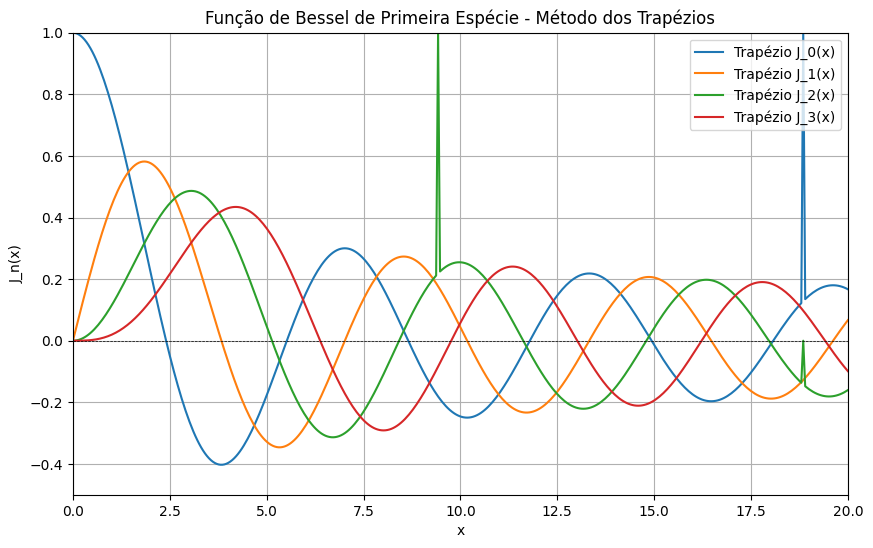

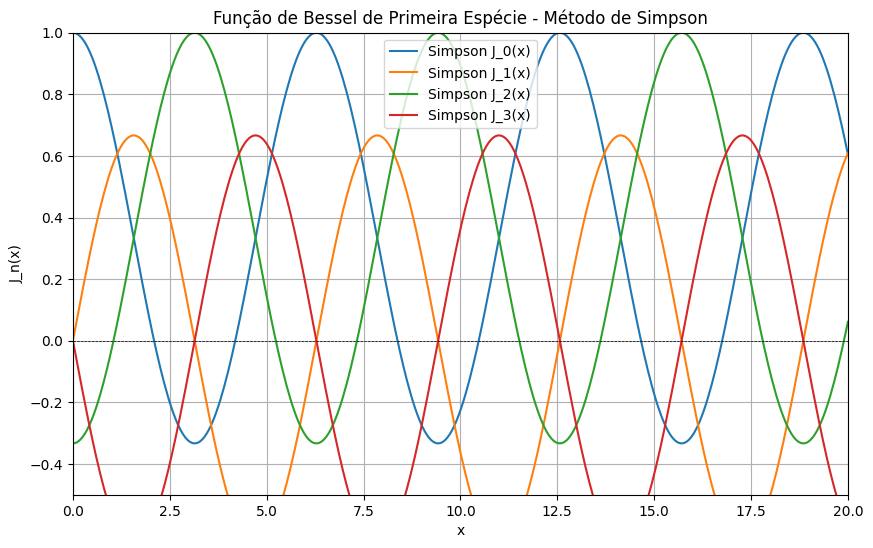

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Método do Trapézio
def regra_trapezio(funcao, a, b, n):
    h = (b - a) / n
    integral = 0.5 * (funcao(a) + funcao(b))
    for i in range(1, n):
        integral += funcao(a + i * h)
    integral *= h
    return integral

# Método de Simpson
def regra_simpson(funcao, a, b, n):
    if n % 2 != 0:  # O número de subintervalos precisa ser par
        n += 1
    h = (b - a) / n
    integral = funcao(a) + funcao(b)

    for i in range(1, n, 2):
        integral += 4 * funcao(a + i * h)
    for i in range(2, n, 2):
        integral += 2 * funcao(a + i * h)

    integral *= h / 3
    return integral

# Função de Bessel usando o método numérico de integração
def bessel(n, x, metodo='trapezio', tolerancia=1e-5):
    def integranda(t):
        return np.cos(n * t - x * np.sin(t))

    num_pontos = 1
    if metodo == 'trapezio':
        integral_antiga = regra_trapezio(integranda, 0, np.pi, num_pontos)
    elif metodo == 'simpson':
        integral_antiga = regra_simpson(integranda, 0, np.pi, num_pontos)

    while True:
        num_pontos *= 2
        if metodo == 'trapezio':
            integral_nova = regra_trapezio(integranda, 0, np.pi, num_pontos)
        elif metodo == 'simpson':
            integral_nova = regra_simpson(integranda, 0, np.pi, num_pontos)

        if abs(integral_nova - integral_antiga) < tolerancia:
            break
        integral_antiga = integral_nova

    return integral_nova / np.pi

# Definindo o intervalo para x
x_values = np.linspace(0, 20, 400)
n_values = [0, 1, 2, 3]  # Ordens da função de Bessel que queremos plotar

# Primeiro gráfico: Função de Bessel usando Trapézio
plt.figure(figsize=(10, 6))
for n in n_values:
    jn_values_trap = [bessel(n, x, metodo='trapezio') for x in x_values]
    plt.plot(x_values, jn_values_trap, label=f'Trapézio J_{n}(x)')
plt.title('Função de Bessel de Primeira Espécie - Método dos Trapézios')
plt.xlabel('x')
plt.ylabel('J_n(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal em y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical em x=0
plt.grid()
plt.legend()
plt.xlim(0, 20)
plt.ylim(-0.5, 1)
plt.show()

# Segundo gráfico: Função de Bessel usando Simpson
plt.figure(figsize=(10, 6))
for n in n_values:
    jn_values_simp = [bessel(n, x, metodo='simpson') for x in x_values]
    plt.plot(x_values, jn_values_simp, label=f'Simpson J_{n}(x)')
plt.title('Função de Bessel de Primeira Espécie - Método de Simpson')
plt.xlabel('x')
plt.ylabel('J_n(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Linha horizontal em y=0
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Linha vertical em x=0
plt.grid()
plt.legend()
plt.xlim(0, 20)
plt.ylim(-0.5, 1)
plt.show()




lista b

teste dos valores

In [39]:
# Valores esperados para as funções de Bessel
valores_esperados = {
    (0, 1): 0.7651976866,
    (0, 1.5): 0.5118276717,
    (1, 1): 0.4400505857449335,
    (1, 1.5): 0.5579365079,
    (2, 1): 0.1149034849319005,
    (2, 1.5): 0.2320876721
}

# Teste de comparação
for (n, x), esperado in valores_esperados.items():
    resultado_simpson = jn_bessel_simpson(n, x)
    resultado_trapezio = jn_bessel_trapezio(n, x)

    print(f"J_{n}({x}):")
    print(f"  - Valor esperado: {esperado}")
    print(f"  - Regra de Simpson: {resultado_simpson:.10f} (Erro absoluto: {abs(esperado - resultado_simpson):.10e})")
    print(f"  - Regra do Trapézio: {resultado_trapezio:.10f} (Erro absoluto: {abs(esperado - resultado_trapezio):.10e})")
    print()


J_0(1):
  - Valor esperado: 0.7651976866
  - Regra de Simpson: 0.7651976866 (Erro absoluto: 4.2033487802e-11)
  - Regra do Trapézio: 0.7651976866 (Erro absoluto: 4.2033487802e-11)

J_0(1.5):
  - Valor esperado: 0.5118276717
  - Regra de Simpson: 0.5118276717 (Erro absoluto: 3.5917713248e-11)
  - Regra do Trapézio: 0.5118276717 (Erro absoluto: 3.5919045516e-11)

J_1(1):
  - Valor esperado: 0.4400505857449335
  - Regra de Simpson: 0.4400505857 (Erro absoluto: 0.0000000000e+00)
  - Regra do Trapézio: 0.4400505857 (Erro absoluto: 0.0000000000e+00)

J_1(1.5):
  - Valor esperado: 0.5579365079
  - Regra de Simpson: 0.5579365079 (Erro absoluto: 1.0102807479e-11)
  - Regra do Trapézio: 0.5579365079 (Erro absoluto: 1.0099698855e-11)

J_2(1):
  - Valor esperado: 0.1149034849319005
  - Regra de Simpson: 0.1149034849 (Erro absoluto: 2.9143354396e-16)
  - Regra do Trapézio: 0.1149034849 (Erro absoluto: 5.5511151231e-17)

J_2(1.5):
  - Valor esperado: 0.2320876721
  - Regra de Simpson: 0.2320876721 (

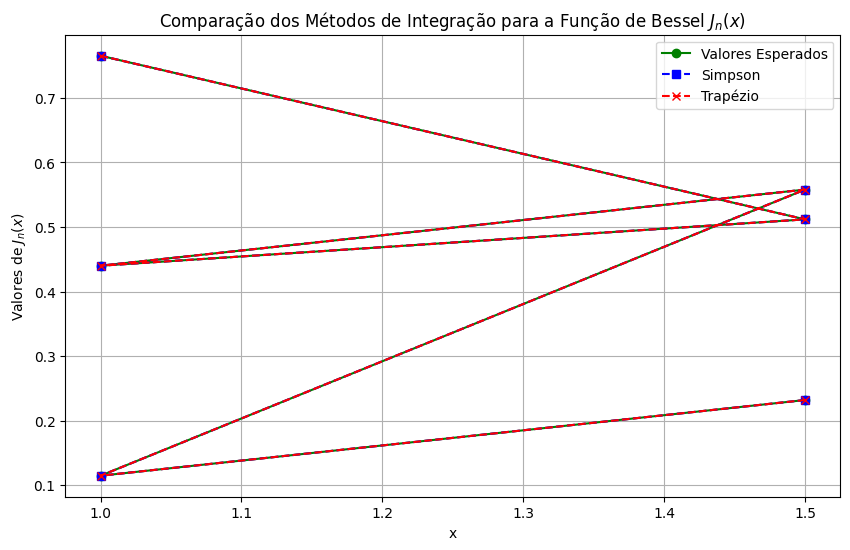

In [38]:
import matplotlib.pyplot as plt

# Listas para armazenar resultados
n_values = [0, 0, 1, 1, 2, 2]
x_values = [1, 1.5, 1, 1.5, 1, 1.5]
valores_esperados = [0.7651976866, 0.5118276717, 0.4400505857, 0.5579365079, 0.1149034849, 0.2320876721]
valores_simpson = []
valores_trapezio = []

# Coletar os valores calculados
for i, (n, x) in enumerate(zip(n_values, x_values)):
    resultado_simpson = jn_bessel_simpson(n, x)
    resultado_trapezio = jn_bessel_trapezio(n, x)

    valores_simpson.append(resultado_simpson)
    valores_trapezio.append(resultado_trapezio)

# Plotagem
plt.figure(figsize=(10, 6))

plt.plot(x_values, valores_esperados, 'o-', label="Valores Esperados", color="green")
plt.plot(x_values, valores_simpson, 's--', label="Simpson", color="blue")
plt.plot(x_values, valores_trapezio, 'x--', label="Trapézio", color="red")

# Adicionar título e labels
plt.title("Comparação dos Métodos de Integração para a Função de Bessel $J_n(x)$")
plt.xlabel("x")
plt.ylabel("Valores de $J_n(x)$")
plt.legend()

# Exibir o gráfico
plt.grid(True)
plt.show()


Implementamos ambas as regras para calcular a função de Bessel e comparamos os resultados de cada método. O objetivo era verificar se ambos os métodos convergem para valores semelhantes ao aproximar a integral com uma tolerância de $10^{-5}$.

A regra de Simpson oferece maior precisão em menos iterações que a regra do trapézio, sendo uma escolha preferível quando maior precisão é necessária. Ambos os métodos podem ser aplicados com diferentes níveis de tolerância, permitindo que sejam ajustados conforme a necessidade de precisão. A abordagem numérica escolhida proporciona uma boa estimativa para a função de Bessel, com erro controlado, e os resultados podem ser visualizados claramente através dos gráficos, permitindo uma fácil comparação entre os dois métodos de integração.

## Relatório

*(As questões do relatório eu inclui no final de cada questão para ficar mais simples o contexto onde elas foram abordadas, e o uso de referencias como o colab das aulas, as apostilas da matérias e fiz a questão 1 e começo da 2 com o auxilio do meu companheiro de turma Lucas onde ficamos em chamada vendo conceitos matemáticos e partir da 2 foi feito por mim de forma interina, logo quero salientar que usei vários casos e métodos e todas as questões tem uma ligação forte uma com as outras e isso esta presente no relatório em que no caso a ultima questão foi usada tanto o método do trapézio quando o método de Simpson para aplicadas no conceito para resolver ou ver o quão erro uma função poderia ter na representação numérica)*